In [3]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics
from pandas import read_csv, concat
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
indic = "zcr"
type  = "max"
all = True
useSilent = False

In [6]:
noice = read_csv("noice_anal/anal_" + indic + ".txt", "\t")
noice_answer = np.zeros(noice["sum"].size)

if useSilent:
    silent = read_csv("silent_anal/anal_" + indic + ".txt", "\t")
    silent_answer = np.zeros(silent["sum"].size)

voice = read_csv("voice_anal/anal_" + indic + ".txt", "\t")
voice_answer = np.ones(voice["sum"].size)

KeyError: 'sum'

In [ ]:
np.random.RandomState(seed =1)

In [ ]:
if useSilent:
    data = concat([voice, noice, silent])
else:
    data = concat([voice, noice])#, silent
data_y = np.random.randint(0, 100, data[type].size)
if useSilent:
    data_answer  = np.concatenate((voice_answer, noice_answer, silent_answer))
else:
    data_answer  = np.concatenate((voice_answer, noice_answer))#, silent_answer

In [ ]:
print (data[type].size)

In [2]:
print (data)

NameError: name 'data' is not defined

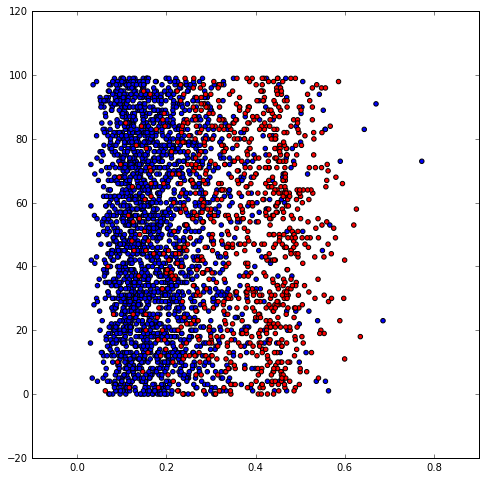

In [781]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(data[type], data_y, c = data_answer, cmap = colors)

In [782]:
if all:
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, data_answer, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)
else:
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data[type], data_answer, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [783]:
print (test_labels[0:15])

[ 1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.]


### Линейная классификация

In [784]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [785]:
# print train_data

In [786]:
if not all:
    train_data = train_data.reshape(-1, 1)
    test_data = test_data.reshape(-1, 1)

In [787]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [788]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [789]:
print (test_labels[0:50])

[ 1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.]


In [790]:
print (ridge_predictions[0:50])

[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.]


In [791]:
#оценка качества классификации
#доля правильных ответов на тестовой выборке
metrics.accuracy_score(test_labels, ridge_predictions)

0.85993820803295573

In [792]:
ridge_classifier.coef_

array([[  4.11920754e-04,  -1.66799845e+00,  -1.66799845e+00,
         -1.66799845e+00]])

In [793]:
ridge_classifier.intercept_ 

array([ 1.52866763])

In [794]:
ridge_classifier.predict

<bound method LinearClassifierMixin.predict of RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)>

In [795]:
print (test_data[0:10])

        sum       avg       min       max
2146  510.0  0.498047  0.498047  0.498047
481   166.0  0.162109  0.162109  0.162109
2246   97.0  0.094727  0.094727  0.094727
1951  109.0  0.106445  0.106445  0.106445
1087  182.0  0.177734  0.177734  0.177734
284   337.0  0.329102  0.329102  0.329102
171   309.0  0.301758  0.301758  0.301758
518   291.0  0.284180  0.284180  0.284180
1415  202.0  0.197266  0.197266  0.197266
574   441.0  0.430664  0.430664  0.430664


In [796]:
    ridge_classifier._decision_function([29.652344 , 0.287887,  0.137207,  0.375977])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.20469686]])

In [797]:
arr1 = [  6.03061087e-04,  -1.87091677e+00,  -1.87091677e+00, -1.87091677e+00]

In [798]:
arr2 = [29.652344 , 0.287887,  0.137207,  0.375977]

In [799]:
(np.dot(arr1, arr2) +1.2667888)

-0.214066193055932

### AUC

In [800]:
metrics.roc_auc_score(test_labels, ridge_predictions)

0.78234246005820507

In [801]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = 0)

0.72727272727272729

In [802]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = 1)

0.8939197930142303

### Свой классификатор

In [823]:
def energy_result(x):
    add = 0
    #if abs(x[0]) < 0.02:
#            add -= 10
    return (-0.43582075 + np.dot(x, [-5.19400273e-05, 7.44976464e-01, 7.44976464e-01, 7.44976464e-01]) > 0) +  add

In [824]:
def zcr_result(x):
    add = 1.2667888
    return (np.dot(x, [6.03061087e-04, -1.87091677e+00, -1.87091677e+00, -1.87091677e+00]) +  add) > 0

In [825]:
def mfcc_result(x):
    add = 0.61336651
    return (np.dot(x,  [-8.70000408e-02, -4.49398273e-04, 5.31164313e+00, 2.36476296e+00]) +  add) > 0

In [826]:
def autoc_result(x):
    add = 0.59867863
    return (np.dot(x,  [-0.15975306,  0.0412668 , -0.41195572, -0.15356962]) +  add) > 0

In [838]:
def summary(x):
    
    return zcr_result(x) >= 1

In [828]:
#list(map(lambda x:  summary(x), test_data.values))

In [829]:
myown_predictions = list(map(lambda x: 1 if summary(x) else 0, test_data.values))

In [830]:
#print(myown_predictions[0:50])

In [831]:
#print (test_labels[0:50])

In [832]:
metrics.accuracy_score(test_labels, myown_predictions)

0.83110195674562304

In [833]:
metrics.roc_auc_score(test_labels, myown_predictions)

0.83598919047336218

In [835]:
#metrics.pr_auc_score(test_labels, myown_predictions)

In [836]:
metrics.precision_score(test_labels, myown_predictions, pos_label = 0) #шум

0.59687500000000004

In [837]:
metrics.precision_score(test_labels, myown_predictions, pos_label = 1) #речь

0.94623655913978499

In [505]:
for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9
